In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#loading dataset
df = pd.read_csv('Kaggle_Training_Dataset_v2.csv',low_memory=False)

In [6]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [8]:
df.isnull().sum()


sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [9]:
print(df['lead_time'].median())
print(df['lead_time'].mean())

8.0
7.872267035168343


In [10]:
df['lead_time'] = df['lead_time'].fillna(df['lead_time'].median())


In [11]:
df.dropna(inplace=True)


In [48]:
df.isnull().sum()


national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [13]:
categorical_columns = []
columns = df.columns
for name in columns:
    print(name)
    if df[name].dtype==object:
        categorical_columns.append(name)

sku
national_inv
lead_time
in_transit_qty
forecast_3_month
forecast_6_month
forecast_9_month
sales_1_month
sales_3_month
sales_6_month
sales_9_month
min_bank
potential_issue
pieces_past_due
perf_6_month_avg
perf_12_month_avg
local_bo_qty
deck_risk
oe_constraint
ppap_risk
stop_auto_buy
rev_stop
went_on_backorder


In [17]:
categorical_columns

['sku',
 'potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [15]:
def values_counts( list):
    for i in list:
        logging.info(df[i].value_counts())

In [ ]:
x

In [18]:
for i in categorical_columns:
    df[i].replace(['No','Yes'],[0,1],inplace=True)

In [19]:
df.drop('sku',inplace=True, axis=1)

In [20]:
df.head()


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1687860 entries, 0 to 1687859
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1687860 non-null  float64
 1   lead_time          1687860 non-null  float64
 2   in_transit_qty     1687860 non-null  float64
 3   forecast_3_month   1687860 non-null  float64
 4   forecast_6_month   1687860 non-null  float64
 5   forecast_9_month   1687860 non-null  float64
 6   sales_1_month      1687860 non-null  float64
 7   sales_3_month      1687860 non-null  float64
 8   sales_6_month      1687860 non-null  float64
 9   sales_9_month      1687860 non-null  float64
 10  min_bank           1687860 non-null  float64
 11  potential_issue    1687860 non-null  int64  
 12  pieces_past_due    1687860 non-null  float64
 13  perf_6_month_avg   1687860 non-null  float64
 14  perf_12_month_avg  1687860 non-null  float64
 15  local_bo_qty       1687860 non-null  

In [27]:
#selecting feature
corr_matrix = df.corr()
corr_with_y = corr_matrix["went_on_backorder"].drop("went_on_backorder")
print(corr_with_y)

national_inv        -0.001315
lead_time           -0.018104
in_transit_qty      -0.002427
forecast_3_month    -0.000340
forecast_6_month    -0.000840
forecast_9_month    -0.001030
sales_1_month       -0.001131
sales_3_month       -0.001512
sales_6_month       -0.001728
sales_9_month       -0.001764
min_bank            -0.001867
potential_issue      0.014090
pieces_past_due      0.000516
perf_6_month_avg     0.011676
perf_12_month_avg    0.011593
local_bo_qty         0.009504
deck_risk           -0.011691
oe_constraint        0.003837
ppap_risk            0.008814
stop_auto_buy       -0.002424
rev_stop            -0.001708
Name: went_on_backorder, dtype: float64


In [28]:
features = ['national_inv', 'lead_time', 'sales_1_month', 'pieces_past_due', 'perf_6_month_avg','in_transit_qty',
            'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']

In [29]:
x = df[features]


In [30]:
x.shape

(1687860, 12)

In [31]:
y=df['went_on_backorder']


In [32]:
y.shape

(1687860,)

<Axes: >

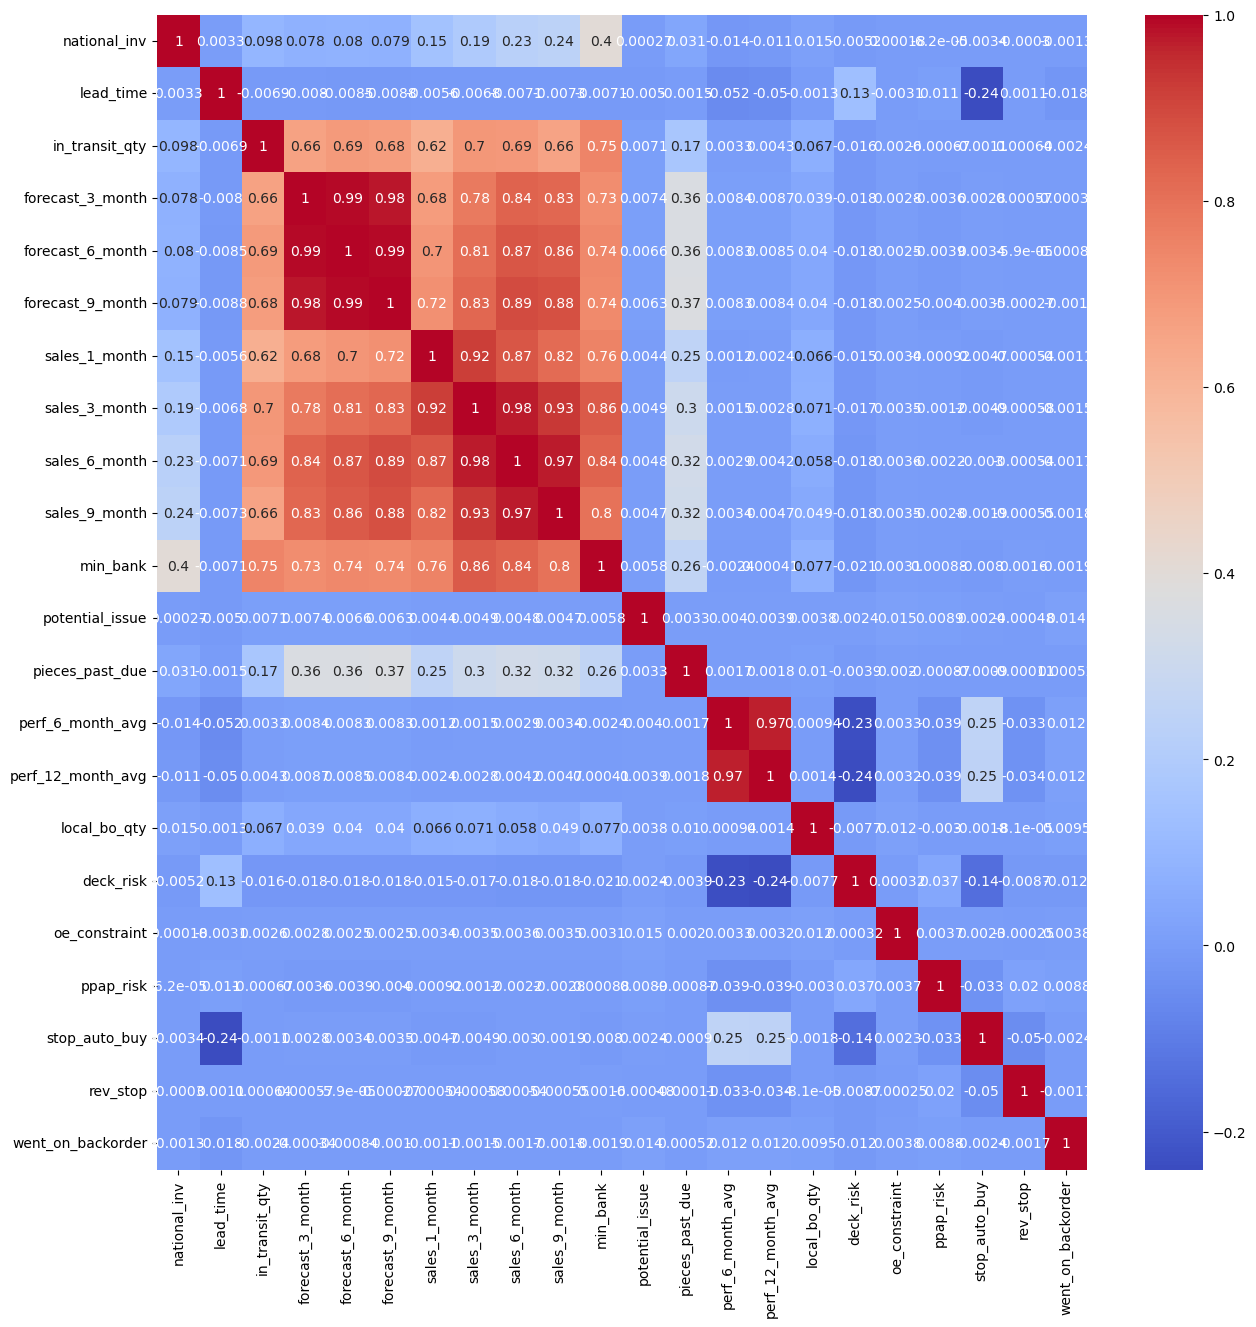

In [35]:
plt.figure(figsize=(15,15))
import seaborn as sns
corr = df.corr()

# heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [36]:
df['went_on_backorder'].value_counts()

went_on_backorder
0    1676567
1      11293
Name: count, dtype: int64

In [38]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
x_resampled, y_resampled = oversampler.fit_resample(x, y)
print(y_resampled.value_counts())

went_on_backorder
0    1676567
1    1676567
Name: count, dtype: int64


In [39]:
x_resampled.shape


(3353134, 12)

In [41]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, random_state=0, test_size=0.2)

In [42]:
y_train.value_counts()


went_on_backorder
1    1341254
0    1341253
Name: count, dtype: int64

<Figure size 2000x2000 with 0 Axes>

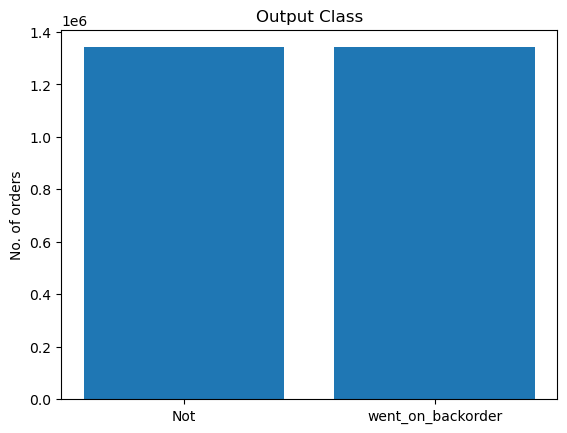

In [43]:
classes=['Not','went_on_backorder']
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.bar(classes,y_train.value_counts())
plt.title("Output Class")
plt.ylabel("No. of orders")
plt.show()

In [51]:
# gradient boosting (kashish(small))
from sklearn.ensemble import GradientBoostingClassifier
model_3 = GradientBoostingClassifier(n_estimators=100)
model_3.fit(x_train, y_train)
y_pred_3 = model_3.predict(x_test)
acc_score_3 = accuracy_score(y_test, y_pred_3)
conf_matrix = confusion_matrix(y_test, y_pred_3)
print("Accuracy Score for Gradient Boosting",acc_score_3)


Accuracy Score for Gradient Boosting 0.8648995641392309
